# VD1

In [1]:
from sympy import Symbol
import numpy as np
from scipy.optimize import minimize
from autograd import grad
import autograd.numpy as np1
import matplotlib.pyplot as plt
import torch
import math

# x_initial = -0.6
x0 = 2.0

Kappa = 0.5

k = 0

alpha = 0

eps = 0.4

delta = 0.3

num_of_component_functions = 2 

def J_delta(x):
    J_delta = []
    for i in range (1, num_of_component_functions + 1):
        if (f(x, i) >= F(x) - delta):
            J_delta.append(i)
    return J_delta

def f(x, i):
    if i == 1:
        return x
    if i == 2:
        return x**2 -1
    
def F(x):
    return max(f(x, i) for i in range (1, num_of_component_functions + 1))

def objective(X, x): # X = [b, p] [X[0], X[1]]
    return X[0] + 1/2 * np.linalg.norm(X[1])**2            # b + 1/2 ||p||^2

def constraint1(X): # X = [b, p] 
    x1 = torch.tensor(x, requires_grad=True) #Tensor
    output1 = f(x1, 1)
    output1.backward()
    grad_f_1 = x1.grad
    return -1*(np.dot(grad_f_1, X[1]) + f(x, 1) - X[0])    # <f'_1(x),p> + f_1(x) - b <= 0           

def constraint2(X): # X = [b, p]
    x2 = torch.tensor(x, requires_grad=True) #Tensor
    output2 = f(x2, 2)
    output2.backward()
    grad_f_2 = x2.grad
    return -1*(np.dot(grad_f_2, X[1]) + f(x, 2) - X[0])    # <f'_2(x),p> + f_2(x) - b <= 0

def solve_p(X, x): # x0 là giá trị tại bước lặp thứ k, p = X[1:] là hướng giảm, X = [b, p]
    k_delta = J_delta(x)        # Tại bước lặp k, tìm bộ chỉ số của ràng buộc bài toán con
    constraint = []
    if 1 in k_delta:
        constraint.append({'type':'ineq', 'fun': constraint1})
    if 2 in k_delta:
        constraint.append({'type':'ineq', 'fun': constraint2})
    # print(constraint)
    res = minimize(objective, x0= X, args = (x), constraints=constraint, tol=1e-6)
    return res.x # 

def gradient(X, x): # X = [b, p]
    Kappa_new = 1
    while (F(np.array(x) + Kappa_new * np.array(X[1])) > F(np.array(x)) - Kappa_new * eps * np.linalg.norm(X[1])**2):
        Kappa_new = Kappa_new * Kappa
    x_new = np.array(x) + Kappa_new * np.array(X[1])
    return x_new

c:\Anaconda\envs\Python3_10_10\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


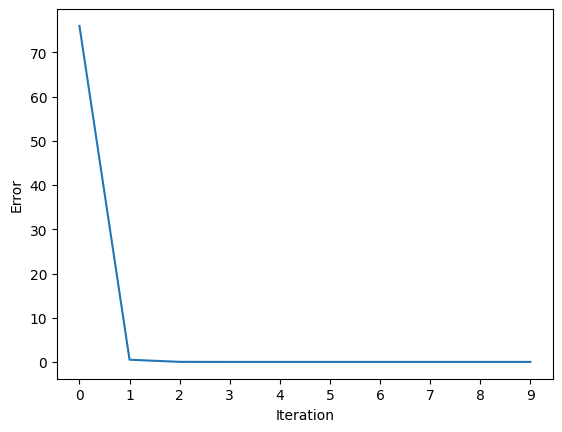

Hướng giảm tại thời điểm dừng thuật toán:  2.054220057335558e-10
Nghiệm tối ưu là:  -0.6180339887498698
Giá trị tối ưu là:  -0.6180339887498698
Giá trị b là:  -0.6180339887498698


In [4]:
import matplotlib.pyplot as plt
import torch

number_of_iteration = 10
p = -1.0
x0 = 5.0
b = F(x0)
X = [b, p]

err = []
iter_arr = []

for iter in range (number_of_iteration):
    x = x0
    X_new = solve_p(X, x)                            # vector [b, p, x_k]
    # print(X_new)
    x_new = gradient(X_new, x)                      # x_k+1
    # print(x_new)
    x0 = x_new
    X = [F(x_new), X_new[1]]                     # [x_k+1, p_k]
    err.append(F(x_new) - X_new[0])
    iter_arr.append(iter)

plt.plot(iter_arr, err, label='iter towards loss')
plt.xticks(np.arange(10, step  = 1))
plt.xlabel('Iteration')
plt.ylabel(r'Error')
plt.show()
# plt.tight_layout()
print("Hướng giảm tại thời điểm dừng thuật toán: ", X_new[1])
print("Nghiệm tối ưu là: ", x_new)
print("Giá trị tối ưu là: ", F(x_new))
print("Giá trị b là: ", X_new[0])

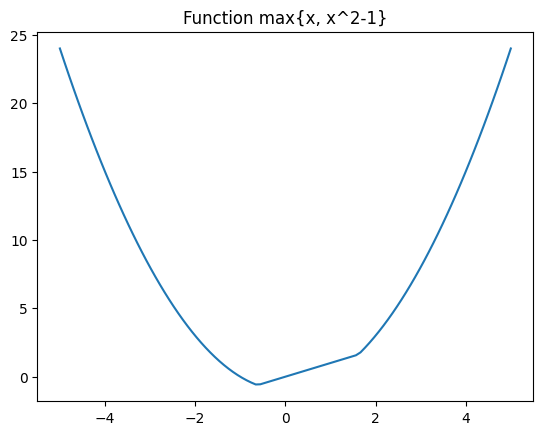

In [5]:
import numpy as np
x = np.linspace(-5, 5, 100)
y = []
for num in x:
    y.append(F(num))
plt.plot(x, y)
plt.title('Function max{x, x^2-1}')
plt.show()

### Kiểm tra tính ổn định của nghiệm

In [3]:
from sympy import Symbol
import numpy as np
from scipy.optimize import minimize
from autograd import grad
import autograd.numpy as np1
import matplotlib.pyplot as plt
import torch
import math
import random 

Kappa = 0.5

k = 0

alpha = 0

eps = 0.4

delta = 0.3

num_of_component_functions = 2 

def J_delta(x):
    J_delta = []
    for i in range (1, num_of_component_functions + 1):
        if (f(x, i) >= F(x) - delta):
            J_delta.append(i)
    return J_delta

def f(x, i):
    if i == 1:
        return x
    if i == 2:
        return x**2 -1
    
def F(x):
    return max(f(x, i) for i in range (1, num_of_component_functions + 1))

def objective(X, x): # X = [b, p] [X[0], X[1]]
    return X[0] + 1/2 * np.linalg.norm(X[1])**2            # b + 1/2 ||p||^2

def constraint1(X): # X = [b, p] 
    y1 = f(x, 1)
    grad_f1 = torch.autograd.grad(y1, x, create_graph=True)
    return -1*(np.dot(grad_f1[0].detach().numpy(), X[1:]) + y1.detach().item() - X[0])    

def constraint2(X): # X = [b, p]
    y2 = f(x, 2)
    grad_f2 = torch.autograd.grad(y2, x, create_graph=True)
    return -1*(np.dot(grad_f2[0].detach().numpy(), X[1:]) + y2.detach().item() - X[0])

def solve_p(X, x): # x0 là giá trị tại bước lặp thứ k, p = X[1:] là hướng giảm, X = [b, p]
    k_delta = J_delta(x)        # Tại bước lặp k, tìm bộ chỉ số của ràng buộc bài toán con
    constraint = []
    if 1 in k_delta:
        constraint.append({'type':'ineq', 'fun': constraint1})
    if 2 in k_delta:
        constraint.append({'type':'ineq', 'fun': constraint2})
    # print(constraint)
    res = minimize(objective, x0= X, args = (x), constraints=constraint, tol=1e-6)
    return res.x # 

def gradient(X, x): # X = [b, p]
    Kappa_new = 1
    while (F(x + Kappa_new * np.array(X[1])) > F(x) - Kappa_new * eps * np.linalg.norm(X[1])**2):
        Kappa_new = Kappa_new * Kappa
    x_new = x + Kappa_new * np.array(X[1])
    return x_new

if __name__ == "__main__":        
    number_of_iteration = 10
    res = {}
    comparison = 100
    b = 2.0
    p = -1.0
    X = [b, p]
    for i in range (comparison):
        x0 = random.randrange(-1000, 1000)
        x0 = torch.tensor(float(x0), requires_grad=True)
        for iter in range (number_of_iteration):
            x = x0
            X_new = solve_p(X, x)                            # vector [b, p, x_k]
            x_new = gradient(X_new, x)                      # x_k+1
            x0 = torch.tensor(x_new, requires_grad=True)
            X = [F(x0).detach().item(), X_new[1]]
            # print(X)                     # [x_k+1, p_k]
        # print("Nghiệm tối ưu là: ", x_new)
        # print("Giá trị tối ưu là: ", F(x_new))
        res[i] = F(x_new)
    print(res)


C:\Users\This PC\AppData\Local\Temp\ipykernel_6212\602445441.py:84: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x0 = torch.tensor(x_new, requires_grad=True)


{0: tensor(-0.6180, grad_fn=<AddBackward0>), 1: tensor(-0.6180, grad_fn=<AddBackward0>), 2: tensor(-0.6180, grad_fn=<AddBackward0>), 3: tensor(-0.6180, grad_fn=<AddBackward0>), 4: tensor(-0.6180, grad_fn=<AddBackward0>), 5: tensor(-0.6180, grad_fn=<AddBackward0>), 6: tensor(-0.6180, grad_fn=<AddBackward0>), 7: tensor(-0.6180, grad_fn=<AddBackward0>), 8: tensor(-0.6180, grad_fn=<AddBackward0>), 9: tensor(-0.6180, grad_fn=<AddBackward0>), 10: tensor(-0.6180, grad_fn=<AddBackward0>), 11: tensor(-0.6180, grad_fn=<AddBackward0>), 12: tensor(-0.6180, grad_fn=<AddBackward0>), 13: tensor(-0.6180, grad_fn=<AddBackward0>), 14: tensor(-0.6180, grad_fn=<AddBackward0>), 15: tensor(-0.6180, grad_fn=<AddBackward0>), 16: tensor(-0.6180, grad_fn=<AddBackward0>), 17: tensor(-0.6180, grad_fn=<AddBackward0>), 18: tensor(-0.6180, grad_fn=<AddBackward0>), 19: tensor(-0.6180, grad_fn=<AddBackward0>), 20: tensor(-0.6180, grad_fn=<AddBackward0>), 21: tensor(-0.6180, grad_fn=<AddBackward0>), 22: tensor(-0.6180,

# VD2

In [3]:
from sympy import Symbol
import numpy as np
from scipy.optimize import minimize
from autograd import grad
import autograd.numpy as np1
import matplotlib.pyplot as plt
import torch
import math

Kappa = 0.5

k = 0

alpha = 0

eps = 0.4

delta = 0.3

num_of_component_functions = 2

stationary_eps = 1e-15

def J_delta(x):
    J_delta = []
    for i in range (1, num_of_component_functions + 1):
        if (f(x, i) >= F(x) - delta):
            J_delta.append(i)
    return J_delta

def f(x, i):
    if i == 1:
        return x[0]**2 + x[1]**2 + x[2]**2
    if i == 2:
        return (3 * x[0] - 2 * x[1] + 4 * x[2])/(2 * x[0] + x[1] + 3 * x[2] + 1)
    
def F(x):
    return max(f(x, i) for i in range (1, num_of_component_functions + 1))

def objective(X, x): # X = [b, p] [X[0], X[1]]
    return X[0] + 1/2 * np.linalg.norm(X[1:])**2            # b + 1/2 ||p||^2

def constraint1(X): # X = [b, p] 
    x1 = torch.tensor(x, requires_grad=True) #Tensor
    output1 = f(x1, 1)
    output1.backward()
    grad_f_1 = x1.grad
    return -1*(np.dot(grad_f_1, X[1:]) + f(x, 1) - X[0])    # <f'_1(x),p> + f_1(x) - b <= 0           

def constraint2(X): # X = [b, p]
    x2 = torch.tensor(x, requires_grad=True) #Tensor
    output2 = f(x2, 2)
    output2.backward()
    grad_f_2 = x2.grad
    return -1*(np.dot(grad_f_2, X[1:]) + f(x, 2) - X[0])    # <f'_2(x),p> + f_2(x) - b <= 0


# def constraint4(x):
    # return 2 * x[0] + x[1] + 3 * x[2] + 1 - stationary_eps

def constraint5(X):
    return -1*(np.dot(np.array([1, 3, 2]), X[1:]) + x[0] + 3 * x[1] + 2 *x[2] - 2)

def solve_p(X, x): # x0 là giá trị tại bước lặp thứ k, p = X[1:] là hướng giảm, X = [b, p]
    k_delta = J_delta(x)        # Tại bước lặp k, tìm bộ chỉ số của ràng buộc bài toán con
    constraint = []
    if 1 in k_delta:
        constraint.append({'type':'ineq', 'fun': constraint1})
    if 2 in k_delta:
        constraint.append({'type':'ineq', 'fun': constraint2})
    # print(constraint)
    # constraint.append({'type':'ineq', 'fun': constraint4})
    constraint.append({'type':'ineq', 'fun': constraint5})
    print(constraint)
    res = minimize(objective, x0= X, args = (x), constraints=constraint, tol=1e-6)
    print(res.x)
    # assert x[0] + 3 * x[1] + 2 * x[2] >= 100
    return res.x # 

def gradient(X, x): # X = [b, p]
    Kappa_new = 1
    while (F(np.array(x) + Kappa_new * np.array(X[1:])) > F(np.array(x)) - Kappa_new * eps * np.linalg.norm(X[1:])**2):
        Kappa_new = Kappa_new * Kappa
    x_new = np.array(x) + Kappa_new * np.array(X[1:])
    return x_new

[{'type': 'ineq', 'fun': <function constraint1 at 0x0000020EB6133D90>}, {'type': 'ineq', 'fun': <function constraint5 at 0x0000020EB6D2CEE0>}]
[-4902.01552276    -9.9999946    -80.00019857     5.99994858]
[{'type': 'ineq', 'fun': <function constraint1 at 0x0000020EB6133D90>}, {'type': 'ineq', 'fun': <function constraint2 at 0x0000020EB6D2D240>}, {'type': 'ineq', 'fun': <function constraint5 at 0x0000020EB6D2CEE0>}]
[-2.16645979e-08  4.69656314e-10  1.52567280e-04  3.05122299e-05]
[{'type': 'ineq', 'fun': <function constraint1 at 0x0000020EB6133D90>}, {'type': 'ineq', 'fun': <function constraint2 at 0x0000020EB6D2D240>}, {'type': 'ineq', 'fun': <function constraint5 at 0x0000020EB6D2CEE0>}]
[2.86953914e-09 4.69656314e-10 1.52567280e-04 3.05122299e-05]
[{'type': 'ineq', 'fun': <function constraint1 at 0x0000020EB6133D90>}, {'type': 'ineq', 'fun': <function constraint2 at 0x0000020EB6D2D240>}, {'type': 'ineq', 'fun': <function constraint5 at 0x0000020EB6D2CEE0>}]
[2.86953914e-09 4.6965631

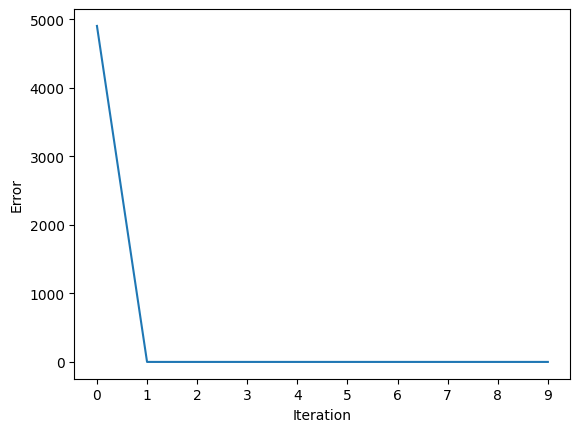

Hướng giảm tại thời điểm dừng thuật toán:  [4.69656314e-10 1.52567280e-04 3.05122299e-05]
Nghiệm tối ưu là:  [2.70253984e-06 5.32838771e-05 4.80248455e-06]
Giá trị tối ưu là:  2.869539136087443e-09
Giá trị b là:  2.869539136087443e-09


In [4]:
import matplotlib.pyplot as plt
import torch

number_of_iteration = 10
x0 = [5.0, 40.0, -3.0]
b = F(x0)
p = [-0.5, -0.5, -0.5]
X = [b, *p] 


err = []
iter_arr = []

for iter in range (number_of_iteration):
    x = x0
    X_new = solve_p(X, x)         
    # print(X_new)                  
    x_new = gradient(X_new, x)                      
    # print(x_new)
    x0 = x_new
    X = [F(x_new), *X_new[1:]]       
    err.append(F(x_new) - X_new[0])
    iter_arr.append(iter)

plt.plot(iter_arr, err, label='iter towards loss')
plt.xlabel('Iteration')
plt.xticks(np.arange(number_of_iteration, step=1))
plt.ylabel(r'Error')
plt.show()
# plt.tight_layout()
print("Hướng giảm tại thời điểm dừng thuật toán: ", X_new[1:])
print("Nghiệm tối ưu là: ", x_new)
print("Giá trị tối ưu là: ", F(x_new))
print("Giá trị b là: ", X_new[0])

In [ ]:
from sympy import Symbol
import numpy as np
from scipy.optimize import minimize
from autograd import grad
import autograd.numpy as np1
import matplotlib.pyplot as plt
import torch
import math, random

Kappa = 0.5

k = 0

alpha = 0

eps = 0.4

delta = 0.3

num_of_component_functions = 2

stationary_eps = 1e-30

def J_delta(x):
    J_delta = []
    for i in range (1, num_of_component_functions + 1):
        if (f(x, i) >= F(x) - delta):
            J_delta.append(i)
    return J_delta

def f(x, i):
    if i == 1:
        return x[0]**2 + x[1]**2 + x[2]**2
    if i == 2:
        return (3 * x[0] - 2 * x[1] + 4 * x[2])/(2 * x[0] + x[1] + 3 * x[2] + 1)
    
def F(x):
    return max(f(x, i) for i in range (1, num_of_component_functions + 1))

def objective(X, x): # X = [b, p] [X[0], X[1]]
    return X[0] + 1/2 * np.linalg.norm(X[1:])**2            # b + 1/2 ||p||^2

def constraint1(X): # X = [b, p] 
    # x1 = torch.tensor(x, requires_grad=True) #Tensor
    y1 = f(x, 1)
    grad_f1 = torch.autograd.grad(y1, x, create_graph=True)
    return -1*(np.dot(grad_f1[0].detach().numpy(), X[1:]) + y1.detach().item() - X[0])        

def constraint2(X): # X = [b, p]
    # x1 = torch.tensor(x, requires_grad=True) #Tensor
    y2 = f(x, 2)
    grad_f2 = torch.autograd.grad(y2, x, create_graph=True)
    return -1*(np.dot(grad_f2[0].detach().numpy(), X[1:]) + y2.detach().item() - X[0])

def constraint3(x):
    return -1 * (2 * x[0] + x[1] + 3 * x[2] + 1 - stationary_eps)

# def constraint5(X):
#     return -1*(np.dot(np.array([1, 3, 2]), X[1:]) + x[0] + 3 * x[1] + 2 *x[2] - 2)

def solve_p(X, x): # x0 là giá trị tại bước lặp thứ k, p = X[1:] là hướng giảm, X = [b, p]
    k_delta = J_delta(x)        # Tại bước lặp k, tìm bộ chỉ số của ràng buộc bài toán con
    constraint = []
    if 1 in k_delta:
        constraint.append({'type':'ineq', 'fun': constraint1})
    if 2 in k_delta:
        constraint.append({'type':'ineq', 'fun': constraint2})
    # print(constraint)
    # constraint.append({'type':'ineq', 'fun': constraint3})
    # print(constraint)
    res = minimize(objective, x0= X, args = (x), constraints=constraint, tol=1e-6)
    return res.x # 

def gradient(X, x): # X = [b, p]
    Kappa_new = 1
    while (F(x + Kappa_new * np.array(X[1:])) > F(x) - Kappa_new * eps * np.linalg.norm(X[1:])**2 and
           2 * (x + Kappa_new * np.array(X[1:]))[0] + (x + Kappa_new * np.array(X[1:]))[1] + 3 * (x + Kappa_new * np.array(X[1:]))[2] + 1 - stationary_eps >= 0):
        Kappa_new = Kappa_new * Kappa
    x_new = x + Kappa_new * np.array(X[1:])
    return x_new

if __name__ == "__main__":    
    number_of_iteration = 10
    res = {}
    comparison = 10
    b = [5.0, 40.0, -3.0]
    p = [-0.5, -0.5, -0.5]
    X = [b, *p] 
    for i in range (comparison):
        x0 = [float(random.randrange(-100, 100)), float(random.randrange(-100, 100)), float(random.randrange(-100, 100))]
        x0 = torch.tensor(x0, requires_grad=True) 
        for iter in range (number_of_iteration):
            x = x0
            X_new = solve_p(X, x)         
            print(X_new)                  
            x_new = gradient(X_new, x)           
            x0 = torch.tensor(x_new, requires_grad=True)           
            X = [F(x_new).detach(), *X_new[1:]]       
        res[x_new] = F(x_new)
    print(res)


# VD3

In [7]:
from sympy import Symbol
import numpy as np
from scipy.optimize import minimize
from autograd import grad
import autograd.numpy as np1
import matplotlib.pyplot as plt
import torch
import math

Kappa = 0.5

k = 0

alpha = 0

eps = 0.4

delta = 0.3

num_of_component_functions = 3

def J_delta(x):
    J_delta = []
    for i in range (1, num_of_component_functions + 1):
        if (f(x, i) >= F(x) - delta):
            J_delta.append(i)
    return J_delta

def f(x, i):
    if i == 1:
        return x[0]**2 + x[1]**2 
    if i == 2:
        return 2 * x[0] + 3 * x[1] + 1
    if i == 3:
        return (x[0]**2 + x[1]**2)/(x[0]**2 + x[1]**2 + 1)
     
def F(x):
    return max(f(x, i) for i in range (1, num_of_component_functions + 1))

def objective(X, x): # X = [b, p] [X[0], X[1]]
    return X[0] + 1/2 * np.linalg.norm(X[1:])**2            # b + 1/2 ||p||^2

def constraint1(X): # X = [b, p] 
    x1 = torch.tensor(x, requires_grad=True) #Tensor
    output1 = f(x1, 1)
    output1.backward()
    grad_f_1 = x1.grad
    return -1*(np.dot(grad_f_1, X[1:]) + f(x, 1) - X[0])    # <f'_1(x),p> + f_1(x) - b <= 0           

def constraint2(X): # X = [b, p]
    x2 = torch.tensor(x, requires_grad=True) #Tensor
    output2 = f(x2, 2)
    output2.backward()
    grad_f_2 = x2.grad
    return -1*(np.dot(grad_f_2, X[1:]) + f(x, 2) - X[0])    # <f'_2(x),p> + f_2(x) - b <= 0

def constraint3(X): # X = [b, p] 
    x3 = torch.tensor(x, requires_grad=True) #Tensor
    output3 = f(x3, 3)
    output3.backward()
    grad_f_3 = x3.grad
    return -1*(np.dot(grad_f_3, X[1:]) + f(x, 3) - X[0])

def solve_p(X, x): # x0 là giá trị tại bước lặp thứ k, p = X[1:] là hướng giảm, X = [b, p]
    k_delta = J_delta(x)        # Tại bước lặp k, tìm bộ chỉ số của ràng buộc bài toán con
    constraint = []
    if 1 in k_delta:
        constraint.append({'type':'ineq', 'fun': constraint1})
    if 2 in k_delta:
        constraint.append({'type':'ineq', 'fun': constraint2})
    if 3 in k_delta:
        constraint.append({'type':'ineq', 'fun': constraint3})
    # print(constraint)
    res = minimize(objective, x0= X, args = (x), constraints=constraint, tol=1e-6)
    return res.x # 

def gradient(X, x): # X = [b, p]
    Kappa_new = 1
    while (F(np.array(x) + Kappa_new * np.array(X[1:])) > F(np.array(x)) - Kappa_new * eps * np.linalg.norm(X[1:])**2):
        Kappa_new = Kappa_new * Kappa
    x_new = np.array(x) + Kappa_new * np.array(X[1:])
    # print(Kappa_new)
    return x_new

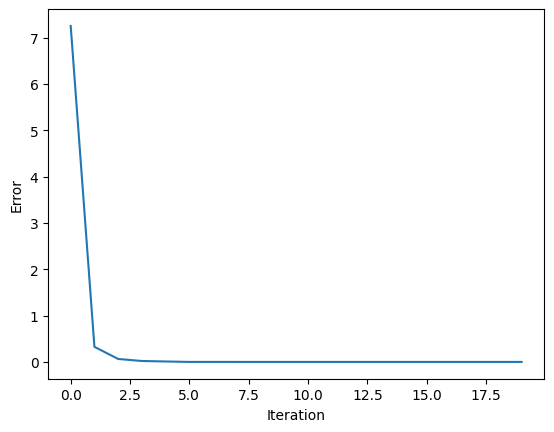

Hướng giảm tại thời điểm dừng thuật toán:  -9.773609540089504e-05
Nghiệm tối ưu là:  [-0.14358719 -0.21528666]
Giá trị tối ưu là:  0.06696562994430566
Giá trị b là:  0.06696562994430566


In [10]:
import matplotlib.pyplot as plt
import torch

number_of_iteration = 20
p = [-0.5, -0.5]
x0 = [1.0, 1.0]
b = F(x0)
X = [b, *p]

err = []
iter_arr = []

for iter in range (number_of_iteration):
    x = x0
    X_new = solve_p(X, x)         
    # print(X_new)                  
    x_new = gradient(X_new, x)                      
    # print(x_new)
    x0 = x_new
    X = [F(x_new), *X_new[1:]]       
    err.append(F(x_new) - X_new[0])
    iter_arr.append(iter)

plt.plot(iter_arr, err, label='iter towards loss')
plt.xlabel('Iteration')
plt.ylabel(r'Error')
# plt.xlabel('Iteration')
# plt.ylabel(r'Error')
plt.show()
# plt.tight_layout()
print("Hướng giảm tại thời điểm dừng thuật toán: ", X_new[1])
print("Nghiệm tối ưu là: ", x_new)
print("Giá trị tối ưu là: ", F(x_new))
print("Giá trị b là: ", X_new[0])

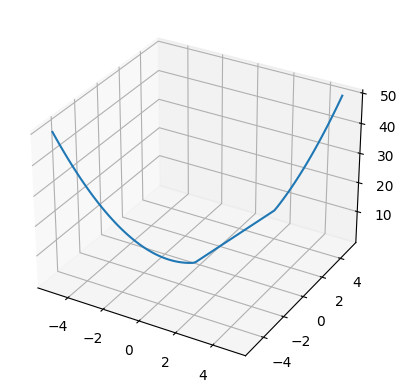

In [26]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
f_data = []
for i in range (len(x)):
    f_data.append([x[i], y[i]])
z = []
for vec in f_data:
    z.append(F(vec))

# z = F([x, y])
ax = plt.axes(projection = '3d')
ax.plot3D(x, y, z)

### Constrained Minimax Problem

#### min max x, 1 <= x <= 5

In [21]:
from sympy import Symbol
import numpy as np
from scipy.optimize import minimize
from autograd import grad
import autograd.numpy as np1
import matplotlib.pyplot as plt
import torch
import math

x0 = 2.0

Kappa = 0.5

k = 0

alpha = 0

eps = 0.4

delta = 0.3

num_of_component_functions = 1

num_of_constraints = 2

def J_delta(x):
    J_delta = []
    for i in range (1, num_of_component_functions + 1):
        if (f(x, i) >= F(x) - delta):
            J_delta.append(i)
    return J_delta

def J1_delta(x):
    J1_delta = []
    for i in range (1, num_of_constraints + 1):
        if (h(x, i) >= H(x) - delta):
            J1_delta.append(i)
    return J1_delta


def f(x, i):
    if i == 1:
        return x
    # if i == 2: 
    #     return x**2

def F(x):
    return max(f(x, i) for i in range (1, num_of_component_functions + 1))

def h(x, i): 
    if i == 1:
        return 1 - x 
    if i == 2:
        return x - 5

def H(x):
    return max(h(x, i) for i in range (1, num_of_constraints + 1))

def objective(X, x): # X = [b, p] [X[0], X[1]]
    return X[0] + 1/2 * np.linalg.norm(X[1])**2            # b + 1/2 ||p||^2

def constraint1(X): # X = [b, p] 
    x1 = torch.tensor(x, requires_grad=True) #Tensor
    output = f(x1, 1)
    output.backward()
    grad_f = x1.grad
    return -1*(np.dot(grad_f, X[1]) + f(x, 1) - X[0])    # <f'_1(x),p> + f_1(x) - b <= 0           

def constraint2(X): # X = [b, p]
    x2 = torch.tensor(x, requires_grad=True) #Tensor
    output = f(x2, 2)
    output.backward()
    grad_f = x2.grad
    return -1*(np.dot(grad_f, X[1]) + f(x, 2) - X[0])    # <f'_2(x),p> + f_2(x) - b <= 0

def constraint_h1(X):
    x3 = torch.tensor(x, requires_grad=True)
    output_h = h(x3, 1)
    output_h.backward()
    grad_h = x3.grad
    return (-1*(np.dot(grad_h, X[1]) + h(x, 1) - X[0]))

def constraint_h2(X):
    x3 = torch.tensor(x, requires_grad=True)
    output_h = h(x3, 2)
    output_h.backward()
    grad_h = x3.grad
    return (-1*(np.dot(grad_h, X[1]) + h(x, 2) - X[0]))

def solve_p(X, x): # x0 là giá trị tại bước lặp thứ k, p = X[1:] là hướng giảm, X = [b, p]
    k_delta = J_delta(x)        # Tại bước lặp k, tìm bộ chỉ số của ràng buộc bài toán con
    k1_delta = J1_delta(x)
    constraint = []
    if 1 in k_delta:
        constraint.append({'type':'ineq', 'fun': constraint1})
    if 2 in k_delta:
        constraint.append({'type':'ineq', 'fun': constraint2})

    # if 1 in k1_delta:
    constraint.append({'type':'ineq', 'fun': constraint_h1})
    # if 2 in k1_delta:
    constraint.append({'type':'ineq', 'fun': constraint_h2})
    # print(constraint)
    res = minimize(objective, x0= X, args = (x), constraints=constraint, tol=1e-6)
    return res.x # 

def gradient(X, x): # X = [b, p]
    Kappa_new = 1
    x_new = x
    print(x_new)
    if (x_new < 1 or x_new > 5):
        return x_new
    while (F(np.array(x_new) + Kappa_new * np.array(X[1])) > F(np.array(x_new)) - Kappa_new * eps * np.linalg.norm(X[1])**2):
        Kappa_new = Kappa_new * Kappa
    x_new = np.array(x) + Kappa_new * np.array(X[1])
    # print("Kappa" , Kappa_new)
    return x_new

if __name__ == "__main__":
    number_of_iteration = 5
    p = -1.0
    x0 = 2.0
    x = x0
    b = F(x0)
    X = [b, p]
    err = []
    iter_arr = []
    for iter in range (number_of_iteration):
        x = x0
        X_new = solve_p(X, x)                            # vector [b, p, x_k]
        # print(X_new)
        x_new = gradient(X_new, x)                      # x_k+1
        # print(x_new)
        x0 = x_new
        X = [F(x_new), X_new[1]]                     # [x_k+1, p_k]
        err.append(F(x_new) - X_new[0])
        iter_arr.append(iter)
    
    print("Hướng giảm tại thời điểm dừng thuật toán: ", X_new[1])
    print("Nghiệm tối ưu là: ", x_new)
    print("Giá trị tối ưu là: ", F(x_new))
    print("Giá trị b là: ", X_new[0])

2.0
0.9999999701976809
0.9999999701976809
0.9999999701976809
0.9999999701976809
Hướng giảm tại thời điểm dừng thuật toán:  -0.49999997019768105
Nghiệm tối ưu là:  0.9999999701976809
Giá trị tối ưu là:  0.9999999701976809
Giá trị b là:  0.5000000000000002


#### Kiểm tra tính ổn định của thuật toán

In [2]:
from sympy import Symbol
import numpy as np
from scipy.optimize import minimize
from autograd import grad
import autograd.numpy as np1
import matplotlib.pyplot as plt
import torch
import math
import random

Kappa = 0.5
alpha = 0
eps = 0.4
delta = 0.3
num_of_component_functions = 3

def J_delta(x):
    J_delta = []
    for i in range (1, num_of_component_functions + 1):
        if (f(x, i) >= F(x) - delta):
            J_delta.append(i)
    return J_delta

def f(x, i):
    if i == 1:
        return x[0]**2 + x[1]**2 
    if i == 2:
        return 2 * x[0] + 3 * x[1] + 1
    if i == 3:
        return (x[0]**2 + x[1]**2)/(x[0]**2 + x[1]**2 + 1)
     
def F(x):
    return max(f(x, i) for i in range (1, num_of_component_functions + 1))

def objective(X, x): # X = [b, p] [X[0], X[1]]
    return X[0] + 1/2 * np.linalg.norm(X[1:])**2            # b + 1/2 ||p||^2

def constraint1(X): # X = [b, p] 
    # x1 = torch.tensor(x, requires_grad=True) #Tensor
    y1 = f(x, 1)
    grad_f1 = torch.autograd.grad(y1, x, create_graph=True)
    return -1*(np.dot(grad_f1[0].detach().numpy(), X[1:]) + y1.detach().item() - X[0])
def constraint2(X): # X = [b, p]
    # x1 = torch.tensor(x, requires_grad=True) #Tensor
    y2 = f(x, 2)
    grad_f2 = torch.autograd.grad(y2, x, create_graph=True)
    return -1*(np.dot(grad_f2[0].detach().numpy(), X[1:]) + y2.detach().item() - X[0])
def constraint3(X): # X = [b, p] 
    # x1 = torch.tensor(x, requires_grad=True) #Tensor
    y3 = f(x, 3)
    grad_f3 = torch.autograd.grad(y3, x, create_graph=True)
    return -1*(np.dot(grad_f3[0].detach().numpy(), X[1:]) + y3.detach().item() - X[0])
def solve_p(X, x): # x0 là giá trị tại bước lặp thứ k, p = X[1:] là hướng giảm, X = [b, p]
    k_delta = J_delta(x)        # Tại bước lặp k, tìm bộ chỉ số của ràng buộc bài toán con
    constraint = []
    if 1 in k_delta:
        constraint.append({'type':'ineq', 'fun': constraint1})
    if 2 in k_delta:
        constraint.append({'type':'ineq', 'fun': constraint2})
    if 3 in k_delta:
        constraint.append({'type':'ineq', 'fun': constraint3})
    # print(constraint)
    res = minimize(objective, x0= X, args = (x), constraints=constraint, tol=1e-6)
    return res.x # 

def gradient(X, x): # X = [b, p]
    Kappa_new = 1
    while (F(x.detach() + Kappa_new * np.array(X[1:])) > F(x.detach()) - Kappa_new * eps * np.linalg.norm(X[1:])**2):
        Kappa_new = Kappa_new * Kappa
    x_new = x.detach() + Kappa_new * X[1:]
    # print(Kappa_new)
    return x_new

if __name__ == "__main__":
    number_of_iteration = 20
    comparison = 20
    res = {}
    p = [-0.5, -0.5]
    b = 5.0
    X = [b, *p]
    for i in range (comparison):
        x0 = [float(random.randrange(-100.0, 100.0)),float(random.randrange(-100.0, 100.0))]
        x0 = torch.tensor(x0, requires_grad=True)
        for iter in range (number_of_iteration):
            x = x0
            X_new = solve_p(X, x)         
            x_new = gradient(X_new, x)                      
            x0 = torch.tensor(x_new, requires_grad=True)
            X = [F(x_new).detach().numpy(), *X_new[1:]]       
        res[i] = F(x_new)
    print(res)

C:\Users\This PC\AppData\Local\Temp\ipykernel_6212\4144993481.py:82: DeprecationWarning: non-integer arguments to randrange() have been deprecated since Python 3.10 and will be removed in a subsequent version
  x0 = [float(random.randrange(-100.0, 100.0)),float(random.randrange(-100.0, 100.0))]
C:\Users\This PC\AppData\Local\Temp\ipykernel_6212\4144993481.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x0 = torch.tensor(x_new, requires_grad=True)


{0: tensor(0.0670, dtype=torch.float64), 1: tensor(0.0670, dtype=torch.float64), 2: tensor(0.0670, dtype=torch.float64), 3: tensor(0.0670, dtype=torch.float64), 4: tensor(0.0670, dtype=torch.float64), 5: tensor(0.0670, dtype=torch.float64), 6: tensor(0.0670, dtype=torch.float64), 7: tensor(0.0670, dtype=torch.float64), 8: tensor(0.0670, dtype=torch.float64), 9: tensor(0.0670, dtype=torch.float64), 10: tensor(0.0670, dtype=torch.float64), 11: tensor(0.0670, dtype=torch.float64), 12: tensor(0.0670, dtype=torch.float64), 13: tensor(0.0670, dtype=torch.float64), 14: tensor(0.0670, dtype=torch.float64), 15: tensor(0.0670, dtype=torch.float64), 16: tensor(0.0670, dtype=torch.float64), 17: tensor(0.0670, dtype=torch.float64), 18: tensor(0.0670, dtype=torch.float64), 19: tensor(0.0670, dtype=torch.float64)}
